# Environment Setup
Set up several instances of variables to be used all through the modelling.

In [4]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [5]:
root_directory = "drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets"
root_public_directory = "drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/public"

In [6]:
filename_zip = "ECG-Dataset.zip" 

# set path for your zip file and
# destination path after unzipping your file.
filepath = f"{root_directory}/{filename_zip}"

destination = f"{root_directory}/"

In [7]:
# unzip the dataset zip file
!unzip {filepath} -d {destination}

Archive:  drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset.zip
  inflating: drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset/mitbih_test.csv  
  inflating: drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset/mitbih_train.csv  
  inflating: drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset/ptbdb_abnormal.csv  
  inflating: drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset/ptbdb_normal.csv  


In [8]:
filename_dir_unzipped = "ECG-Dataset"

dataset_path = f"{root_directory}/{filename_dir_unzipped}/"

In [9]:
input_plots_path = f"{root_public_directory}/Input_Visuals"
output_plots_path = f"{root_public_directory}/Output_Visuals"
saved_models_path = f"{root_public_directory}/Versionified_Models"

# Data Preparation

In [10]:

import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout , Conv2D 
from keras.layers import  Bidirectional, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [11]:
! ls drive/MyDrive/Deep-Learning-Projects/ECG-Prediction-Model/datasets/ECG-Dataset/

mitbih_test.csv  mitbih_train.csv  ptbdb_abnormal.csv  ptbdb_normal.csv


In [12]:
# We read our dataset using pandas dataframe
dataframe = pandas.read_csv(f"{dataset_path}/mitbih_train.csv", header=None)
dataframe.astype('float32')
dataframe = pandas.DataFrame(dataframe)

dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# INPUT VISUALIZATION
- Visualize the dataset. Get to know, the size, info, desription as well as the variables exists in the dataset.

In [13]:
print(f"Dataframe shape is: \n")

dataframe.shape


Dataframe shape is: 



(87554, 188)

In [14]:
print(f"Dataframe Info is: \n")

dataframe.info()

Dataframe Info is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [15]:
# Check if dataset has null values.
# Gets the whole sum of the non nulls.
dataframe.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [16]:

print(f"Dataframe Description: \n\n")
dataframe.describe()


Dataframe Description: 




,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# CORRELATION MATRIX

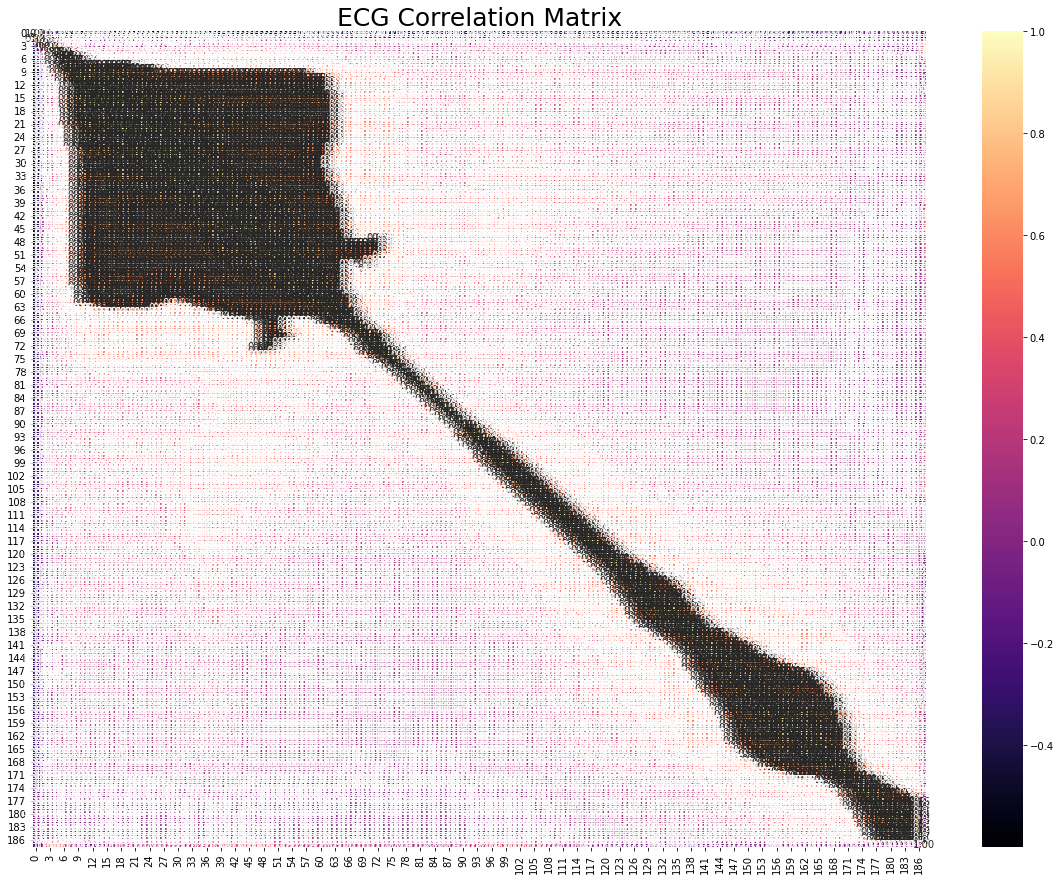

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.778516,0.141264,-0.134788,-0.243921,-0.352727,-0.430698,-0.480058,-0.521888,-0.559848,...,-0.051550,-0.044223,-0.039223,-0.035047,-0.035090,-0.035739,-0.035559,-0.033901,-0.032958,-0.166175
1,0.778516,1.000000,0.501528,-0.024286,-0.148470,-0.164901,-0.234436,-0.285260,-0.322706,-0.341306,...,-0.019324,-0.013356,-0.009154,-0.007511,-0.008674,-0.010175,-0.010693,-0.010116,-0.009987,-0.183442
2,0.141264,0.501528,1.000000,0.672398,0.402170,0.345925,0.281478,0.206464,0.138555,0.077503,...,-0.018531,-0.020627,-0.021478,-0.025592,-0.029119,-0.030466,-0.031462,-0.033109,-0.034741,0.252175
3,-0.134788,-0.024286,0.672398,1.000000,0.819907,0.596827,0.475922,0.389027,0.292549,0.199308,...,-0.017025,-0.024396,-0.028907,-0.036101,-0.041249,-0.042956,-0.043560,-0.045399,-0.046860,0.508486
4,-0.243921,-0.148470,0.402170,0.819907,1.000000,0.881908,0.750680,0.663960,0.563274,0.448298,...,0.020470,0.010719,0.003458,-0.006081,-0.012639,-0.015318,-0.016064,-0.019551,-0.020914,0.508453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.035739,-0.010175,-0.030466,-0.042956,-0.015318,0.005908,0.005361,0.015440,0.023275,0.016165,...,0.738338,0.783177,0.832193,0.895911,0.958530,1.000000,0.953214,0.893247,0.855729,0.037706
184,-0.035559,-0.010693,-0.031462,-0.043560,-0.016064,0.004372,0.003806,0.014076,0.022634,0.015333,...,0.714502,0.753969,0.796068,0.848370,0.903837,0.953214,1.000000,0.948725,0.904684,0.038890
185,-0.033901,-0.010116,-0.033109,-0.045399,-0.019551,0.000171,0.000038,0.010937,0.020454,0.012894,...,0.693137,0.727363,0.764190,0.809050,0.852634,0.893247,0.948725,1.000000,0.965155,0.038924
186,-0.032958,-0.009987,-0.034741,-0.046860,-0.020914,-0.001334,-0.001226,0.010157,0.020295,0.012735,...,0.679757,0.711386,0.744049,0.783552,0.822765,0.855729,0.904684,0.965155,1.000000,0.038146


In [17]:

figure, ax = plt.subplots(figsize= [20,15])
seaborn.heatmap(dataframe.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("ECG Correlation Matrix", fontsize=25)
plt.savefig(f"{input_plots_path}/matrix_correlation_distribution.png")

plt.show()

dataframe.corr()

#  CLASSES CONFIGURATIONS

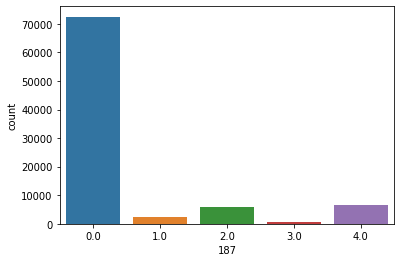

In [18]:
classes_array = []

count_plot = seaborn.countplot(x=187, data = dataframe) 
seaborn.set(rc={'figure.figsize':(20, 10)})
fig = count_plot.get_figure()
fig.savefig(f"{input_plots_path}/Count-Plot-Visualization.png") 


In [19]:
# Create a new dataframe with the classes for 
# mapping purposes, after this stage,
class_1 = dataframe[dataframe[187] == 1.0]
class_2 = dataframe[dataframe[187] == 2.0]
class_3 = dataframe[dataframe[187] == 3.0]
class_4 = dataframe[dataframe[187] == 4.0]

class_0 = dataframe[dataframe[187] == 0.0].sample(n = 8000)

# How should we do that?
#Well, By concatenation.
New_Dataframe = pandas.concat([class_0, class_1, class_2, class_3, class_4])
New_Dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
67034,1.000000,0.886567,0.665672,0.361194,0.119403,0.056716,0.056716,0.017910,0.032836,0.002985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30259,0.942105,0.636842,0.015789,0.200000,0.315789,0.247368,0.257895,0.200000,0.178947,0.178947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18474,1.000000,0.741935,0.491935,0.189516,0.056452,0.028226,0.153226,0.229839,0.270161,0.274194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67474,0.993538,0.959612,0.615509,0.192246,0.169628,0.214863,0.187399,0.161551,0.164782,0.155089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11431,0.945545,0.876238,0.277228,0.000000,0.170792,0.269802,0.282178,0.301980,0.309406,0.306931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

print(f"Dataframe Tail Visuals: \n\n")
dataframe.tail()


Dataframe Tail Visuals: 




,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


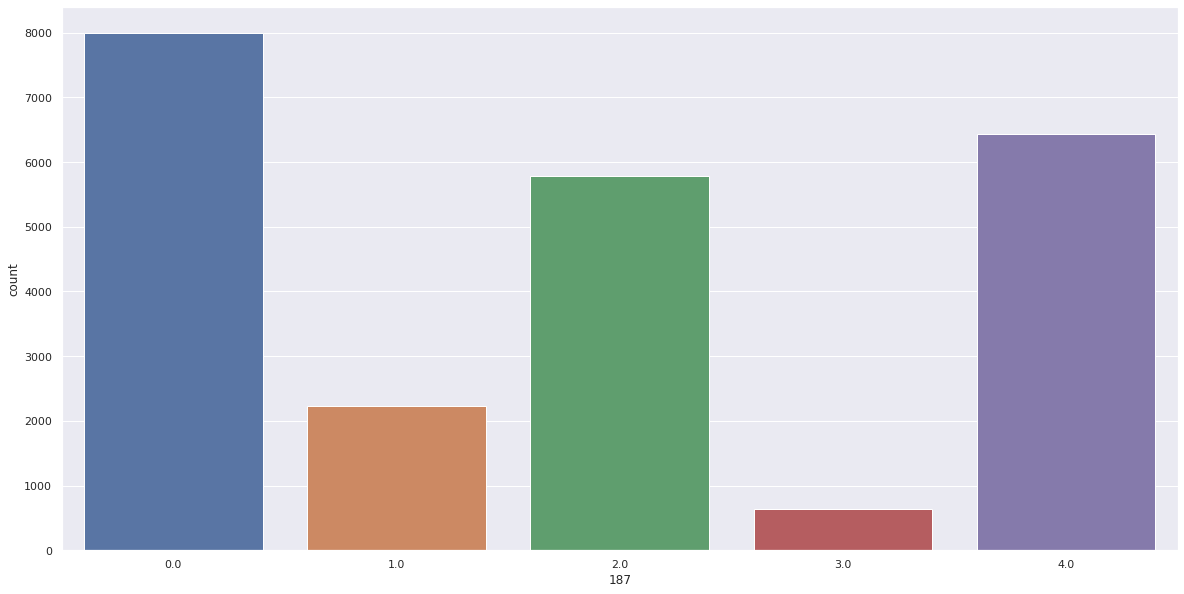

In [21]:

new_count_plot = seaborn.countplot(x=187, data = New_Dataframe) 
seaborn.set(rc={'figure.figsize':(15, 10)})
figure = new_count_plot.get_figure()
figure.savefig(f"{output_plots_path}/Count-Plot-Visualization-After-Classes-Concatenation.png") 


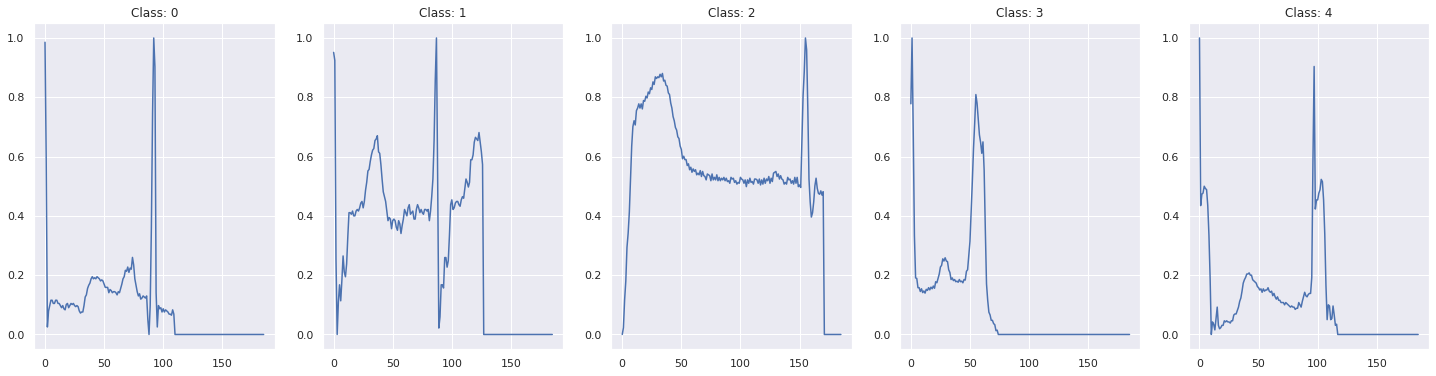

In [22]:
# Graphical representation against each class
index = 0

figure, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,6))

for index in range(5):
  ax[index].plot(New_Dataframe[New_Dataframe[187] == float(index)].sample(1).iloc[0,:186])
  ax[index].set_title(f'Class: {str(index)}')


figure.savefig(f"{output_plots_path}/Count-Plot-Visualization-After-Classes-Concatenation.png")

# DATA SPLITING AND SEGMENTATION

In [23]:

X_train_split_data, X_test_split_data, y_train_split_data, y_test_split_data = train_test_split(
    New_Dataframe.drop([187], axis=1), 
    New_Dataframe[187], 
    test_size = 0.2
)


# FINE TUNING AND DATA REFINERY TECHNIQUES IN ACTION

In [24]:
#RESHAPING OUR DATA

# Reshaping our dataset to get the best dataset our model can understand.
# To fine tune by reshaping helps us to convert our data into imagery format.
# we are going to split our dataset into two parts(X, Y). However, each dataset needs  to be 
# split further into two parts(x = training data and y-Testing data)
X_train_split_data = numpy.array(X_train_split_data).reshape(
        X_train_split_data.shape[0], 
        X_train_split_data.shape[1], 
        1
    )

X_test_split_data = numpy.array(X_test_split_data).reshape(
    X_test_split_data.shape[0], 
    X_test_split_data.shape[1], 
    1
)

print("Shape of our x training data after reshape: ", X_train_split_data.shape)
print("Shape of our x testing data after reshape: ", X_test_split_data.shape)

Shape of our x training data after reshape:  (18466, 187, 1)
Shape of our x testing data after reshape:  (4617, 187, 1)


In [25]:


# Last but not list, doing final tuning on our y train dataset split by 
# changing float values in our dataset to categorical values.
# Converts a class vector (integers) to binary class matrix.
y_train_split_data = to_categorical(y_train_split_data, num_classes = 5, dtype = 'int')
y_test_split_data = to_categorical(y_test_split_data, num_classes = 5, dtype = 'int')

print("Shape of y training data split after float value - categorical values conversion: ", y_train_split_data.shape)
print("Shape of y testing data split after float value - categorical values conversion: ", y_test_split_data.shape)



Shape of y training data split after float value - categorical values conversion:  (18466, 5)
Shape of y testing data split after float value - categorical values conversion:  (4617, 5)


# MODELLING STAGE

# CNN MODEL

In [26]:
# Model Architecture
cnn_model = Sequential()
    
layers = [
    Conv1D(
        filters=32, 
        kernel_size=(3,), 
        padding='same', 
        activation='relu', 
        input_shape = (X_train_split_data.shape[1],1)
    ),
    Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'),
    Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'),
    MaxPool1D(pool_size=(3,), strides=2, padding='same'),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(5, activation='softmax')
]

for layer in layers:
   cnn_model.add(layer)

In [27]:
# Compiling Our Model before training

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Evaluate the summary of our model

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 187, 32)           128       
                                                                 
 conv1d_1 (Conv1D)           (None, 187, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 187, 128)          41088     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 94, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 94, 128)           0         
                                                                 
 flatten (Flatten)           (None, 12032)             0         
                                                        

In [29]:
# Apply Calbacks in our model. 
history = cnn_model.fit(
    X_train_split_data, 
    y_train_split_data, 
    validation_data=(
        X_test_split_data, 
        y_test_split_data
    ), 
    epochs=10 ,  
    batch_size=32
) 

Epoch 1/10
578/578 [==============================] - 16s 7ms/step - loss: 0.3913 - accuracy: 0.8629 - val_loss: 0.2775 - val_accuracy: 0.9058
Epoch 2/10
578/578 [==============================] - 3s 6ms/step - loss: 0.2080 - accuracy: 0.9293 - val_loss: 0.1832 - val_accuracy: 0.9370
Epoch 3/10
578/578 [==============================] - 4s 6ms/step - loss: 0.1571 - accuracy: 0.9458 - val_loss: 0.1665 - val_accuracy: 0.9454
Epoch 4/10
578/578 [==============================] - 4s 6ms/step - loss: 0.1210 - accuracy: 0.9577 - val_loss: 0.1565 - val_accuracy: 0.9485
Epoch 5/10
578/578 [==============================] - 3s 6ms/step - loss: 0.1171 - accuracy: 0.9574 - val_loss: 0.1249 - val_accuracy: 0.9582
Epoch 6/10
578/578 [==============================] - 4s 6ms/step - loss: 0.0840 - accuracy: 0.9695 - val_loss: 0.1262 - val_accuracy: 0.9645
Epoch 7/10
578/578 [==============================] - 4s 7ms/step - loss: 0.0712 - accuracy: 0.9742 - val_loss: 0.1450 - val_accuracy: 0.9617
Epoch

# Saving the Model

In [30]:
cnn_model.save(f"{saved_models_path}/ECG_CNN Prediction_Model.h5")

# Prediction in action with CNN Model

In [31]:
cnn_prediction = cnn_model.predict(X_test_split_data)

print(cnn_prediction)

[[9.99998689e-01 1.13593501e-06 2.52032706e-09 5.77657673e-08
  5.33341316e-10]
 [1.27068085e-20 6.35151926e-22 2.92498230e-14 7.28568019e-33
  1.00000000e+00]
 [1.00000000e+00 3.44719175e-12 1.78939968e-12 2.91737648e-18
  1.03851219e-10]
 ...
 [9.99932289e-01 6.59535290e-05 6.25777297e-09 6.27822260e-07
  1.24550650e-06]
 [3.95544112e-06 2.30471784e-07 9.99893069e-01 6.78841534e-05
  3.47843124e-05]
 [1.41175784e-18 1.32446227e-21 3.86403217e-15 1.47065120e-35
  1.00000000e+00]]


# Evaluate Model history

In [32]:

value_count = 0
print("CNN Model Validation accuracy values: \n")
for acuracy_value in history.history['val_accuracy']:
  value_count += 1
  print(f"{value_count}: ", acuracy_value)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("CNN Model Training accuracy values: \n")
for acuracy_value in history.history['accuracy']:
  value_count += 1
  print(f"{value_count}: ", acuracy_value)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("CNN Model Validation loss values: \n")
for loss in history.history['val_loss']:
  value_count += 1
  print(f"{value_count}: ", loss)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("CNN Model Training loss values: \n")
for loss in history.history['loss']:
  value_count += 1
  print(f"{value_count}: ", loss)  


CNN Model Validation accuracy values: 

1:  0.9057829976081848
2:  0.9369720816612244
3:  0.9454191327095032
4:  0.9484513998031616
5:  0.9581979513168335
6:  0.9644790887832642
7:  0.9616634249687195
8:  0.9625297784805298
9:  0.9590643048286438
10:  0.9584145545959473

------------------------------------------------------------------

CNN Model Training accuracy values: 

1:  0.8629372715950012
2:  0.9292754530906677
3:  0.9457922577857971
4:  0.9576519131660461
5:  0.9573811292648315
6:  0.9694573879241943
7:  0.9742228984832764
8:  0.9765514731407166
9:  0.9788259267807007
10:  0.9823459386825562

------------------------------------------------------------------

CNN Model Validation loss values: 

1:  0.27746686339378357
2:  0.18322625756263733
3:  0.16650190949440002
4:  0.15652132034301758
5:  0.12491876631975174
6:  0.12621761858463287
7:  0.14501385390758514
8:  0.12938296794891357
9:  0.1463194191455841
10:  0.16323231160640717

---------------------------------------------

In [33]:
final_loss, final_accuracy = cnn_model.evaluate(X_test_split_data, y_test_split_data)

print (f"Model Loss was: {final_loss}  :  Model Accuracy was: {final_accuracy}")

145/145 [==============================] - 1s 3ms/step - loss: 0.1632 - accuracy: 0.9584
Model Loss was: 0.16323231160640717  :  Model Accuracy was: 0.9584145545959473


# LSTM MODEL

In [34]:
lstm_model = Sequential()

layers = [
    Bidirectional(
        LSTM(
            64, 
             input_shape=(
                 X_train_split_data.shape[1], 
                 X_train_split_data.shape[2]
             )
        )
    ),
    Dropout(rate = 0.25),
    Dense(5, activation = 'sigmoid')
]

for layer in layers:
   lstm_model.add(layer)

In [35]:
# Compiling Our Model before training

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model

lstm_model.fit(X_train_split_data, y_train_split_data, batch_size = 32, epochs= 10, verbose = 1)

Epoch 1/10
578/578 [==============================] - 14s 15ms/step - loss: 1.0701 - accuracy: 0.5676
Epoch 2/10
578/578 [==============================] - 8s 14ms/step - loss: 0.6086 - accuracy: 0.7829
Epoch 3/10
578/578 [==============================] - 8s 14ms/step - loss: 0.5160 - accuracy: 0.8236
Epoch 4/10
578/578 [==============================] - 8s 14ms/step - loss: 0.4661 - accuracy: 0.8440
Epoch 5/10
578/578 [==============================] - 9s 16ms/step - loss: 0.4280 - accuracy: 0.8545
Epoch 6/10
578/578 [==============================] - 8s 14ms/step - loss: 0.3745 - accuracy: 0.8750
Epoch 7/10
578/578 [==============================] - 8s 14ms/step - loss: 0.3611 - accuracy: 0.8805
Epoch 8/10
578/578 [==============================] - 8s 14ms/step - loss: 0.3495 - accuracy: 0.8834
Epoch 9/10
578/578 [==============================] - 8s 14ms/step - loss: 0.3360 - accuracy: 0.8922
Epoch 10/10
578/578 [==============================] - 8s 14ms/step - loss: 0.3056 - accur

In [37]:
# model summary
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128)              33792     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 34,437
Trainable params: 34,437
Non-trainable params: 0
_________________________________________________________________


# Saving the Model

In [38]:
# Saving the Model
lstm_model.save(f"{saved_models_path}/ECG_LSTM Prediction_Model.h5")

# Prediction in action with LSTM Model

In [39]:
lstm_prediction = lstm_model.predict(X_test_split_data)

print(lstm_prediction)

[[0.9482801  0.65136397 0.17286326 0.52927095 0.08851948]
 [0.10455991 0.15678605 0.22821482 0.01251546 0.99952054]
 [0.9624659  0.46852487 0.21144693 0.02794159 0.65611917]
 ...
 [0.98689204 0.78615284 0.10218596 0.36282492 0.03057315]
 [0.37909874 0.10962453 0.97226894 0.23216027 0.30211192]
 [0.17305745 0.22952892 0.13845274 0.03258707 0.9988807 ]]


# Evaluate Model history

In [40]:

value_count = 0
print("LSTM Model Validation accuracy values: \n")
for acuracy_value in history.history['val_accuracy']:
  value_count += 1
  print(f"{value_count}: ", acuracy_value)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("LSTM Model Training accuracy values: \n")
for acuracy_value in history.history['accuracy']:
  value_count += 1
  print(f"{value_count}: ", acuracy_value)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("CNN Model Validation loss values: \n")
for loss in history.history['val_loss']:
  value_count += 1
  print(f"{value_count}: ", loss)

print("\n------------------------------------------------------------------\n")

value_count = 0
print("LSTM Model Training loss values: \n")
for loss in history.history['loss']:
  value_count += 1
  print(f"{value_count}: ", loss)  


LSTM Model Validation accuracy values: 

1:  0.9057829976081848
2:  0.9369720816612244
3:  0.9454191327095032
4:  0.9484513998031616
5:  0.9581979513168335
6:  0.9644790887832642
7:  0.9616634249687195
8:  0.9625297784805298
9:  0.9590643048286438
10:  0.9584145545959473

------------------------------------------------------------------

LSTM Model Training accuracy values: 

1:  0.8629372715950012
2:  0.9292754530906677
3:  0.9457922577857971
4:  0.9576519131660461
5:  0.9573811292648315
6:  0.9694573879241943
7:  0.9742228984832764
8:  0.9765514731407166
9:  0.9788259267807007
10:  0.9823459386825562

------------------------------------------------------------------

CNN Model Validation loss values: 

1:  0.27746686339378357
2:  0.18322625756263733
3:  0.16650190949440002
4:  0.15652132034301758
5:  0.12491876631975174
6:  0.12621761858463287
7:  0.14501385390758514
8:  0.12938296794891357
9:  0.1463194191455841
10:  0.16323231160640717

-------------------------------------------

# LSTM Model Evaluation

In [41]:
final_loss, final_accuracy = lstm_model.evaluate(X_test_split_data, y_test_split_data)

print (f"Model Loss was: {final_loss}  :  Model Accuracy was: {final_accuracy}")

145/145 [==============================] - 2s 7ms/step - loss: 0.2923 - accuracy: 0.9038
Model Loss was: 0.2923164963722229  :  Model Accuracy was: 0.9038336873054504
